In [1]:
import platform
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.nanops import bottleneck_switch

from Detector_Classes.M3RefTracking import M3RefTracking
from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals, get_efficiency, get_residuals_subdets_with_err, get_rays_in_sub_det_vectorized, get_rays_in_sub_det, get_raw_residuals, get_circle_scan, plot_2D_circle_scan

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dylan-MS-7C84':
    base_dir = '/media/ucla/Saclay/cosmic_data/'
    det_type_info_dir = '/home/dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/media/ucla/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dphnpct50.extra.cea.fr':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 5  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'urw_stats_10-31-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'long_run'

det_single = 'urw_strip'

file_nums = list(range(0, 29))
# file_nums = list(range(0, 109))
# file_nums = 'all'

noise_sigma = 8

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'
alignment_dir = f'{run_dir}alignments/'

z_align_range = [5, 5]  # mm range to search for optimal z position

try:
    os.mkdir(alignment_dir)
except FileExistsError:
    pass
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 237/237 [00:02<00:00, 98.70it/s] 


In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [5]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')
det.load_dream_data(data_dir, ped_dir, noise_sigma, file_nums, chunk_size, save_waveforms=False, waveform_fit_func='parabola_vectorized')
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [5, 6, 7, 8]
HV: {'drift': 600, 'resist_1': 410}
Checking file: CosTb_long_run_pedthr_241031_15H30_000_06_decoded.root
Checking file: CosTb_long_run_pedthr_241031_15H30_000_06_decoded_array.root
Checking file: CosTb_long_run_pedthr_241031_15H30_000_03_decoded.root
Checking file: CosTb_long_run_pedthr_241031_15H30_000_04_decoded_array.root
Checking file: CosTb_long_run_pedthr_241031_15H30_000_03_decoded_array.root
Checking file: CosTb_long_run_pedthr_241031_15H30_000_04_decoded.root
Checking file: CosTb_long_run_datrun_241031_15H30_199_04_decoded_filtered.root
Checking file: CosTb_long_run_datrun_241031_15H30_202_03_decoded_array_filtered.root
Checking file: CosTb_long_run_datrun_241031_15H30_169_03_decoded_filtered.root
Checking file: CosTb_long_run_datrun_241031_15H30_115_03_decoded_filtered.root
Checking file: CosTb_long_run_datrun_241031_15H30_065_06_decoded_filtered.root
Checking file: CosTb_long_run_datrun_241031_15H30_016_03_decoded_array_filtered.root
Ch

100%|██████████| 5/5 [00:08<00:00,  1.69s/it]


Read in data shape: (10665, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 11.02it/s]


Fitting time: 0.7013499736785889 s
Processed sub-chunk 1/1
Processed chunk 1/6


100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


Read in data shape: (10629, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 18.44it/s]


Fitting time: 0.4989292621612549 s
Processed sub-chunk 1/1
Processed chunk 2/6


100%|██████████| 5/5 [00:07<00:00,  1.42s/it]


Read in data shape: (10573, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 19.24it/s]


Fitting time: 0.5282630920410156 s
Processed sub-chunk 1/1
Processed chunk 3/6


100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


Read in data shape: (10736, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 19.18it/s]


Fitting time: 0.5597178936004639 s
Processed sub-chunk 1/1
Processed chunk 4/6


100%|██████████| 5/5 [00:07<00:00,  1.50s/it]


Read in data shape: (10868, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 15.19it/s]


Fitting time: 0.7144272327423096 s
Processed sub-chunk 1/1
Processed chunk 5/6


100%|██████████| 4/4 [00:04<00:00,  1.19s/it]


Read in data shape: (8428, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 22.70it/s]


Fitting time: 0.6138029098510742 s
Processed sub-chunk 1/1
Processed chunk 6/6
Getting hits...
Hits shape: (61899, 256)


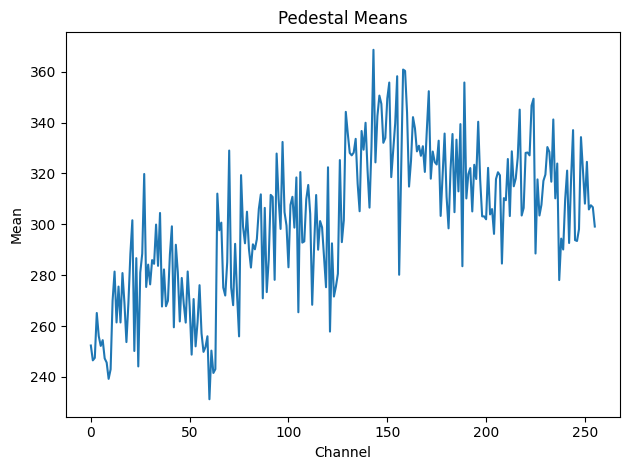

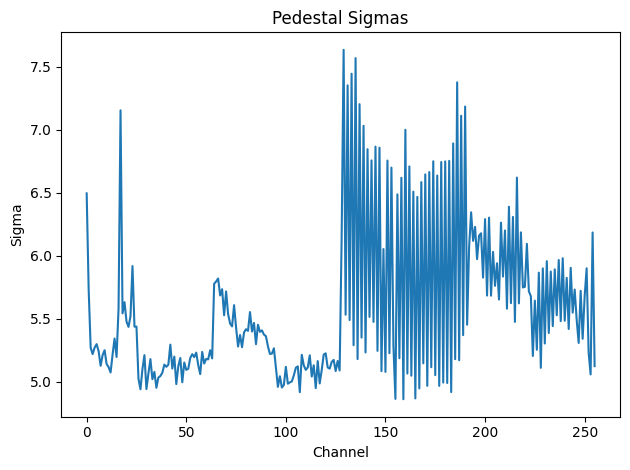

In [6]:
det.dream_data.plot_pedestals()

/local/home/dn277127/PycharmProjects/saclay_micromegas/Detector_Classes/DreamData.py:737: RuntimeWarning: All-NaN slice encountered
  event_max_amps = np.nanmax(self.data_amps, axis=1)


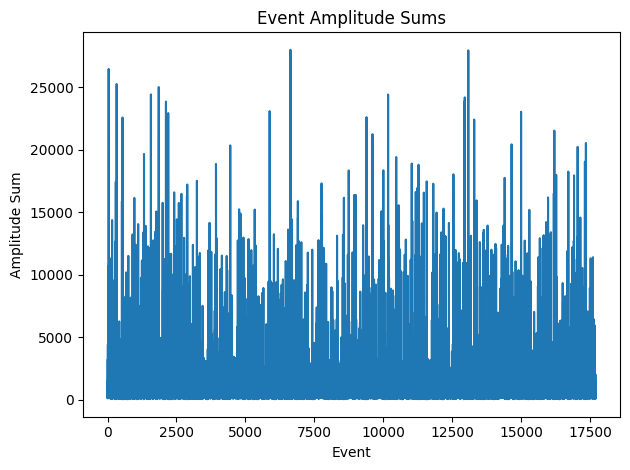

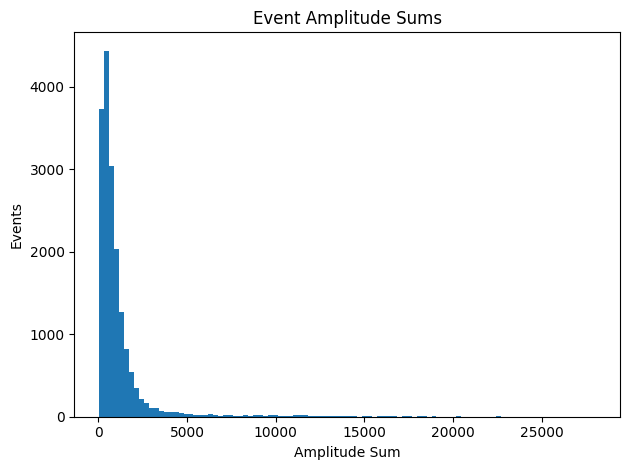

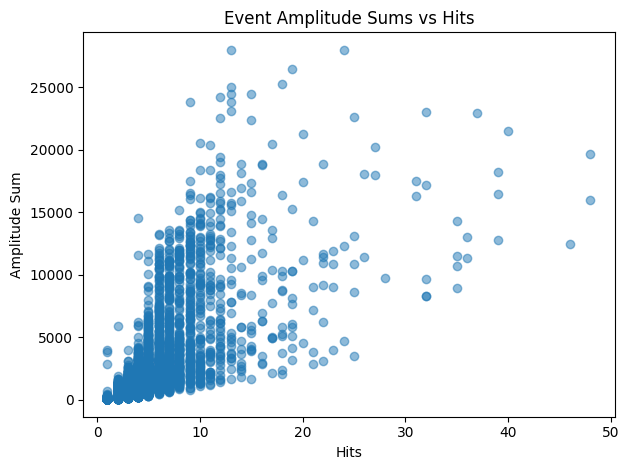

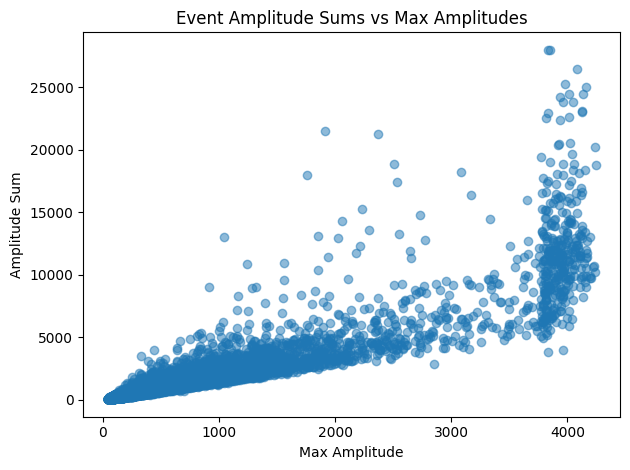

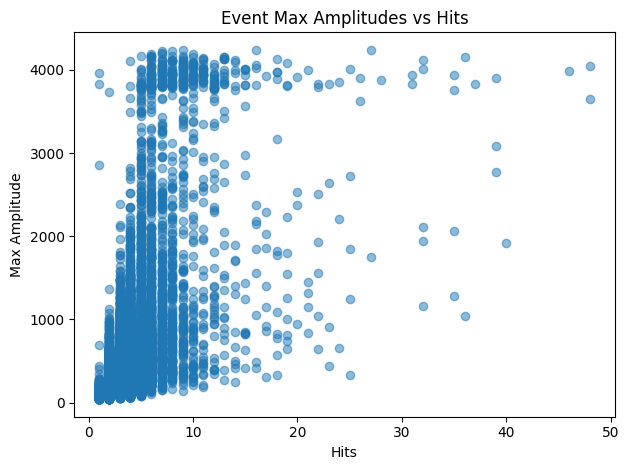

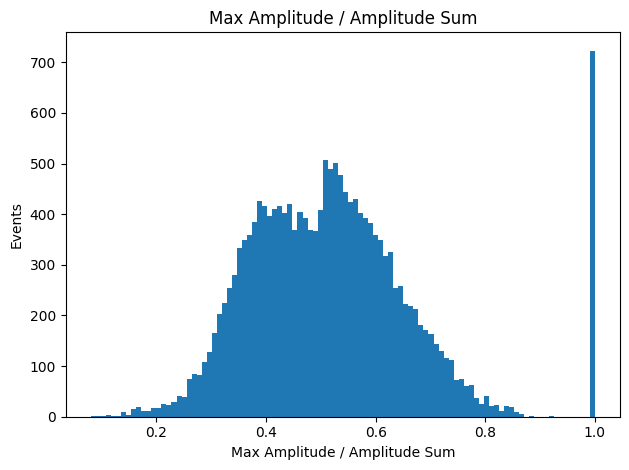

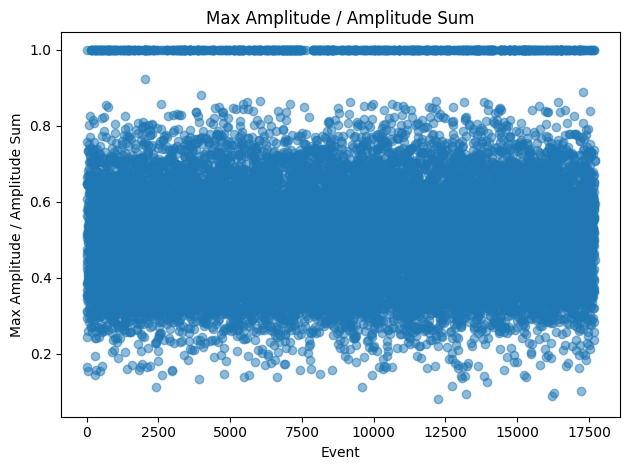

In [7]:
det.dream_data.plot_noise_metric()

Connector 5 Dead Strips: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
Connector 6 Dead Strips: []
Connector 7 Dead Strips: [128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153]
Connector 8 Dead Strips: []


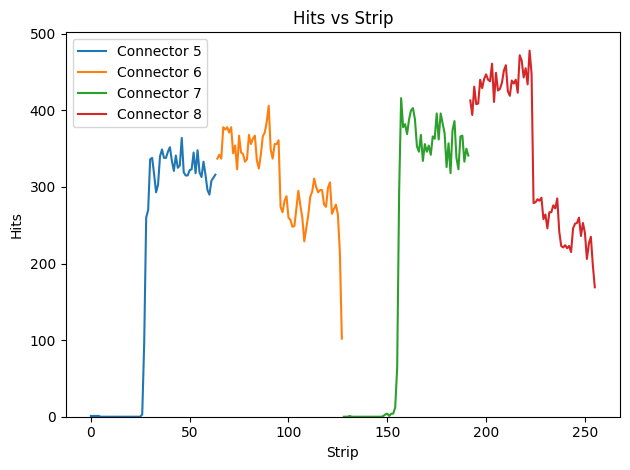

In [8]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

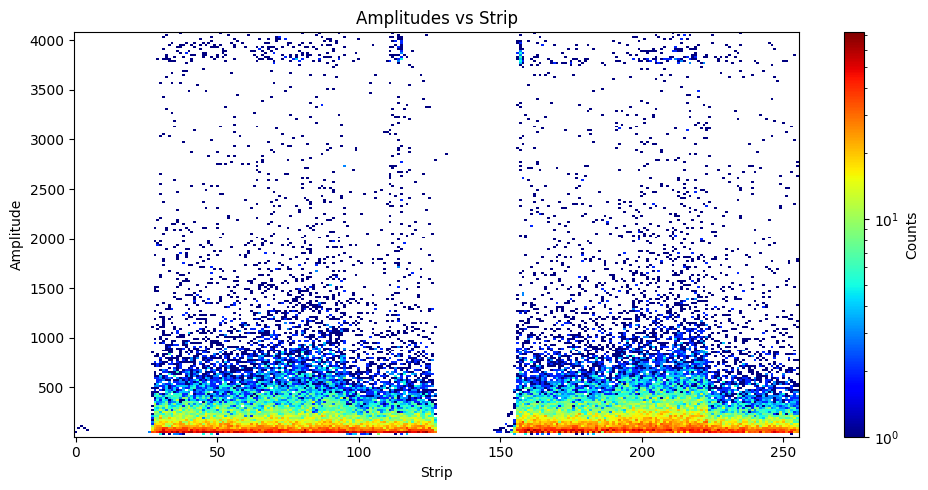

In [9]:
det.dream_data.plot_amplitudes_vs_strip()

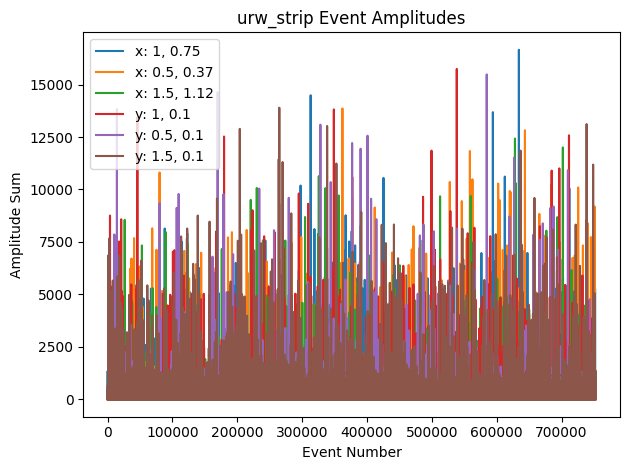

In [10]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

if realign_dream:
    det.add_rotation(90, 'z')

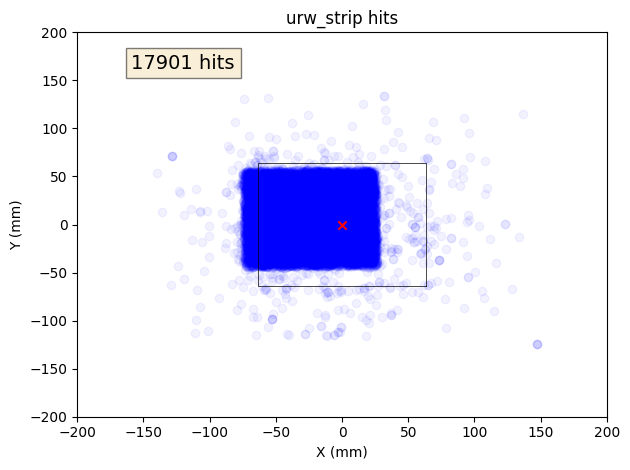

In [11]:
plot_ray_hits_2d(det, ray_data)

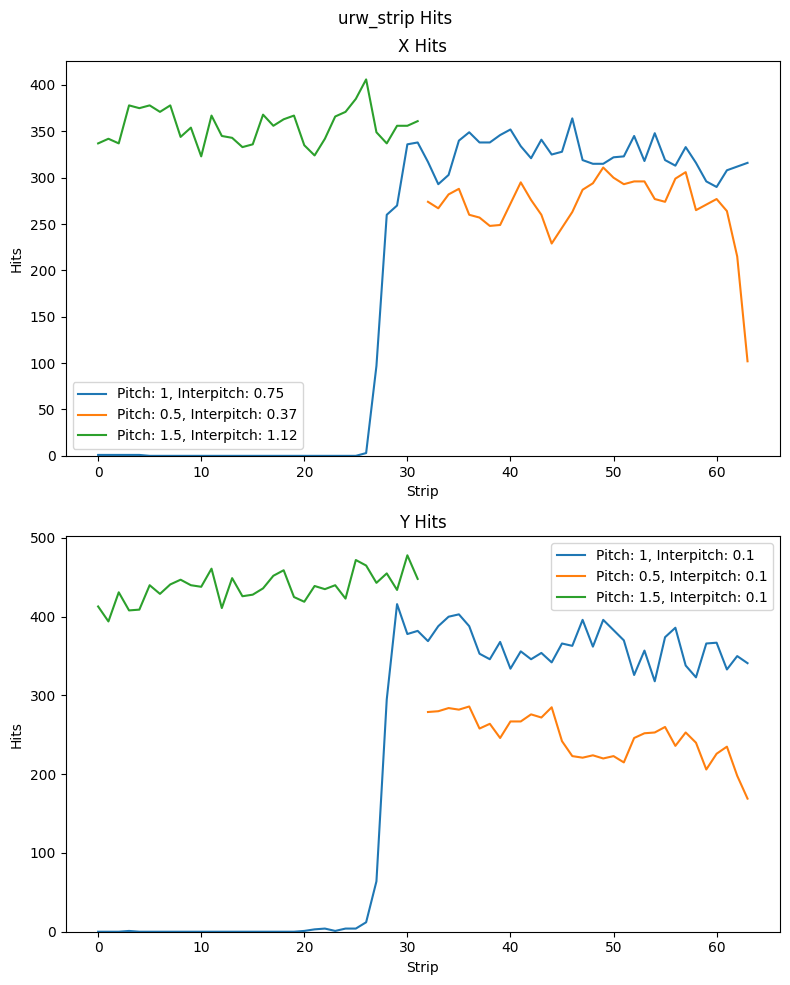

In [12]:
det.plot_hits_1d()

In [13]:
print(len(det.dream_data.hits))

61899


In [14]:
# for event_num in range(min(len(det.dream_data.hits), 2)):
#     det.plot_event_1d(event_num)
#     det.plot_event_2d(event_num)
#     det.dream_data.plot_waveforms(event_num)

z: 794.0
z: 794.3448275862069
z: 794.6896551724138
z: 795.0344827586207
z: 795.3793103448276
z: 795.7241379310345
z: 796.0689655172414
z: 796.4137931034483
z: 796.7586206896551
z: 797.1034482758621
z: 797.448275862069
z: 797.7931034482758
z: 798.1379310344828
z: 798.4827586206897
z: 798.8275862068965
z: 799.1724137931035
z: 799.5172413793103
z: 799.8620689655172
z: 800.2068965517242
z: 800.551724137931
z: 800.8965517241379
z: 801.2413793103449
z: 801.5862068965517
z: 801.9310344827586
z: 802.2758620689655
z: 802.6206896551724
z: 802.9655172413793
z: 803.3103448275862
z: 803.6551724137931
z: 804.0
z_rot: -1.0
z_rot: -0.9310344827586207
z_rot: -0.8620689655172413
z_rot: -0.7931034482758621
z_rot: -0.7241379310344828
z_rot: -0.6551724137931034
z_rot: -0.5862068965517242
z_rot: -0.5172413793103449
z_rot: -0.4482758620689655
z_rot: -0.3793103448275862
z_rot: -0.31034482758620685
z_rot: -0.24137931034482762
z_rot: -0.1724137931034483
z_rot: -0.10344827586206895
z_rot: -0.034482758620689724
z

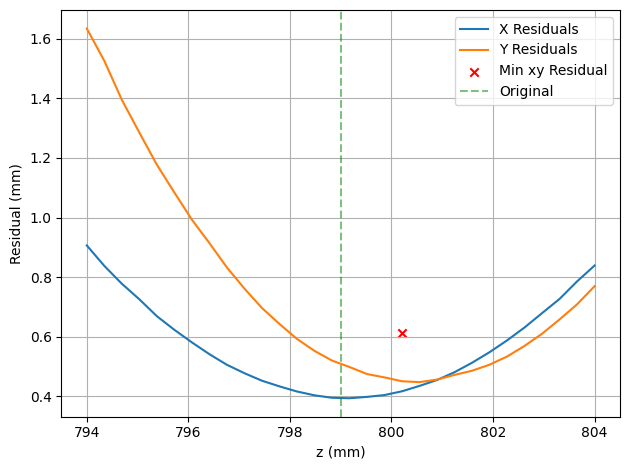

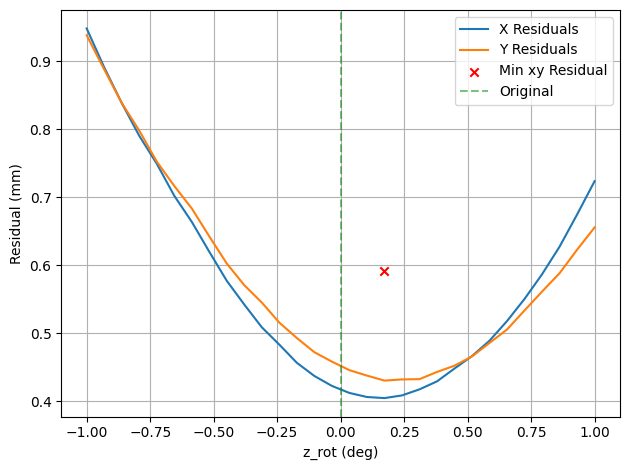

In [15]:
z_orig = det.center[2]
x_bnds = det.center[0] - det.size[0] / 2, det.center[0] + det.size[0] / 2
y_bnds = det.center[1] - det.size[1] / 2, det.center[1] + det.size[1] / 2
ray_traversing_triggers = ray_data.get_traversing_triggers(z_orig, x_bnds, y_bnds, expansion_factor=0.1)

alignment_file = f'{alignment_dir}{det.name}_alignment.txt'
if realign_dream:
    align_dream(det, ray_data, z_align_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

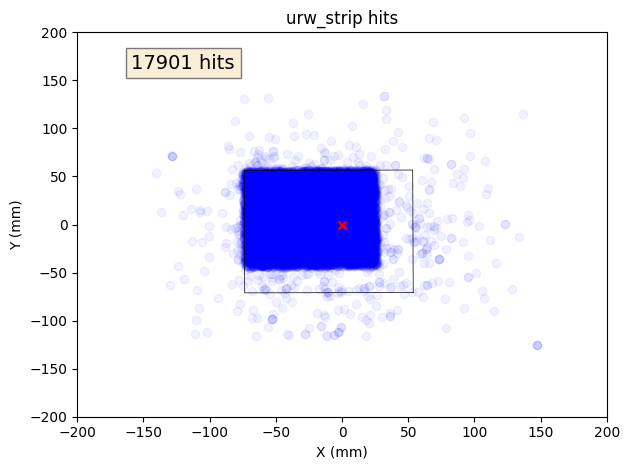

In [16]:
plot_ray_hits_2d(det, ray_data)

Pre-filtered rays: 196575
All rays: 42306


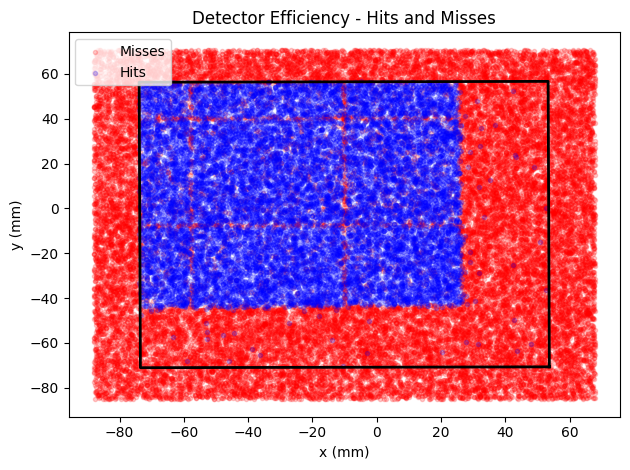

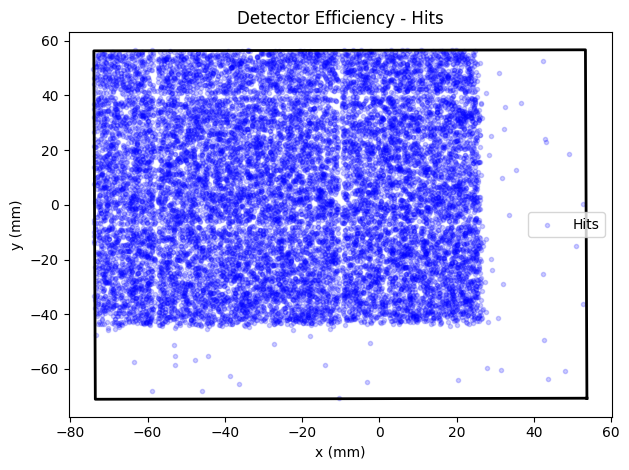

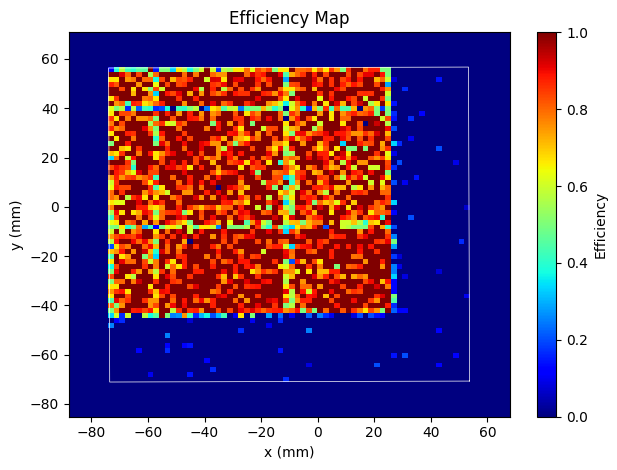

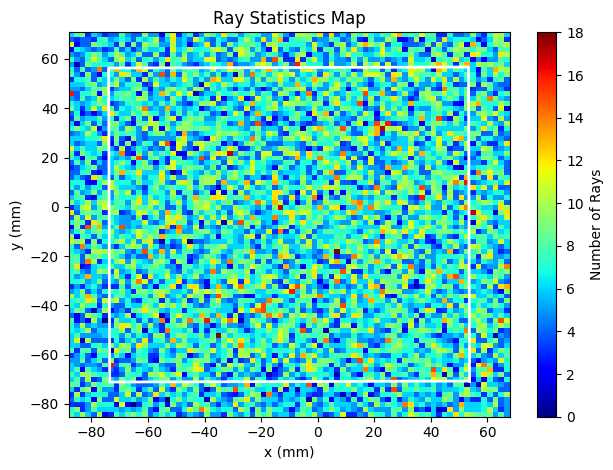

In [17]:
get_efficiency(det, ray_data, plot=True, in_det=True, tolerance=0.2, grid_size=2)

X Residuals: Mean=-11μm, Std=382μm
Y Residuals: Mean=-14μm, Std=398μm
X Residuals: Mean=54μm, Std=469μm
Y Residuals: Mean=20μm, Std=442μm
X Residuals: Mean=-15μm, Std=462μm
Y Residuals: Mean=17μm, Std=435μm
X Residuals: Mean=5μm, Std=396μm
Y Residuals: Mean=-14μm, Std=357μm


/local/home/dn277127/PycharmProjects/saclay_micromegas/poc/det_classes_test.py:1479: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


X Residuals: Mean=0μm, Std=465μm
Y Residuals: Mean=-51μm, Std=448μm
X Residuals: Mean=-1μm, Std=562μm
Y Residuals: Mean=31μm, Std=364μm
X Residuals: Mean=-10μm, Std=355μm
Y Residuals: Mean=-22μm, Std=506μm
X Residuals: Mean=19μm, Std=488μm
Y Residuals: Mean=3μm, Std=550μm
X Residuals: Mean=-4μm, Std=484μm
Y Residuals: Mean=-2μm, Std=525μm


(np.float64(-0.003215412454739681),
 np.float64(-0.0023335636918380355),
 np.float64(0.37406650383463946),
 np.float64(0.40635049957519476))

/local/home/dn277127/PycharmProjects/saclay_micromegas/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


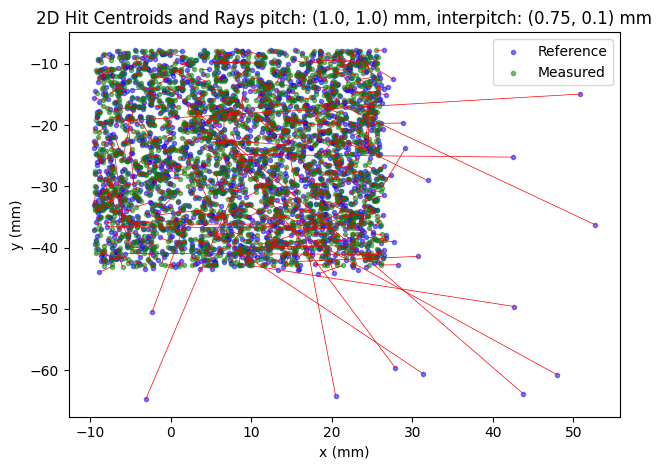

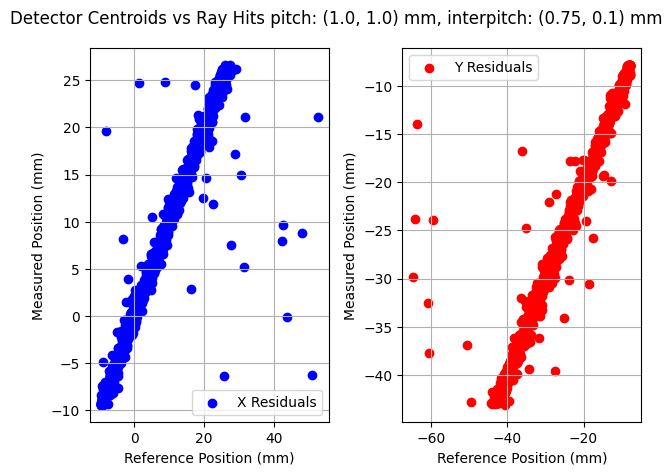

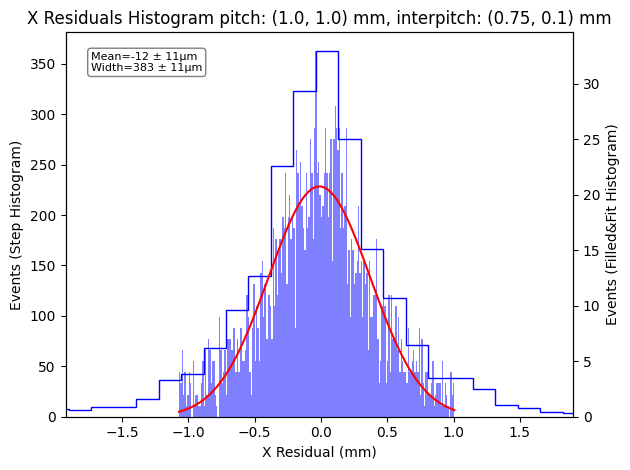

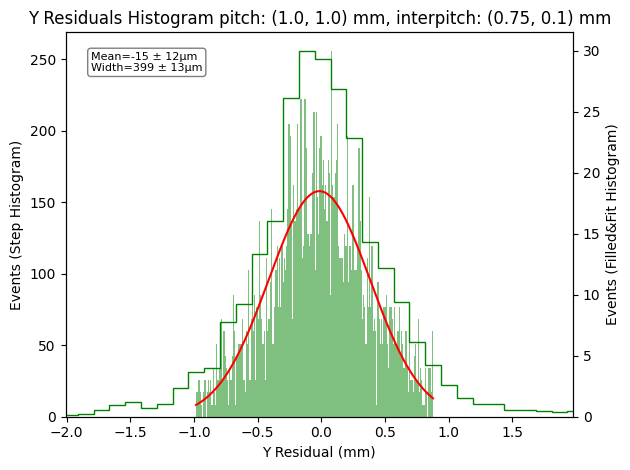

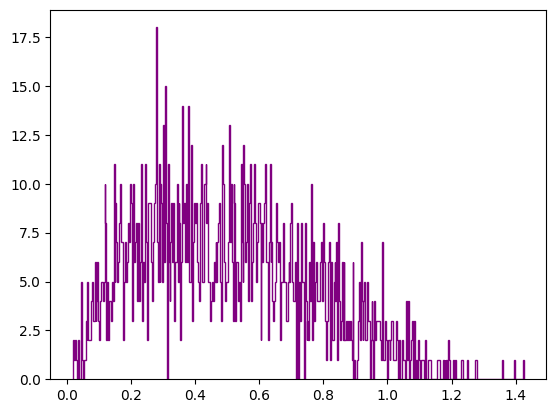

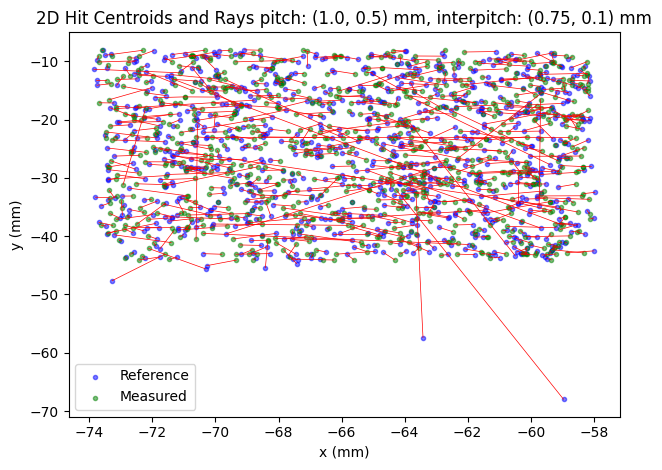

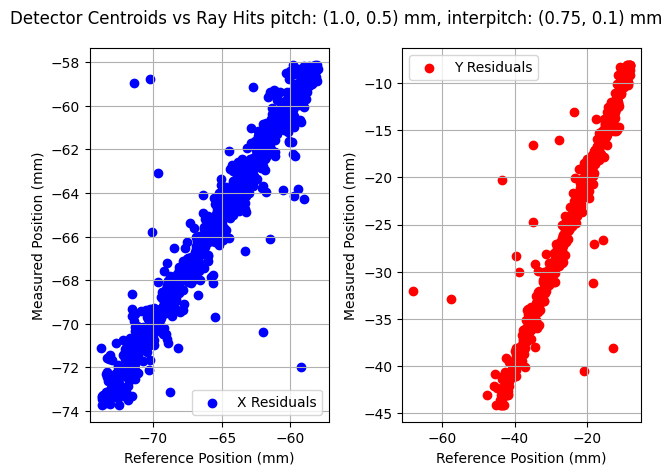

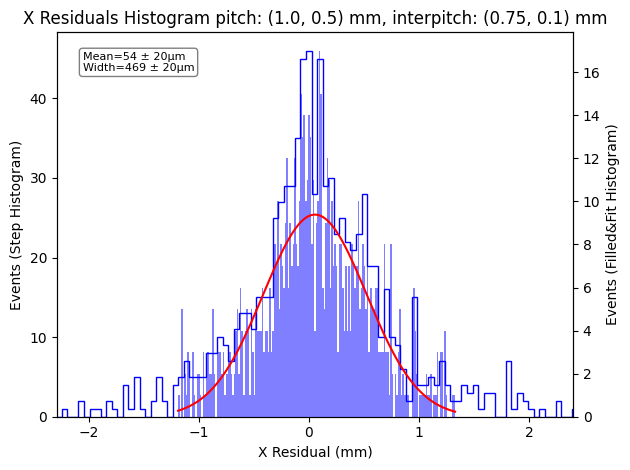

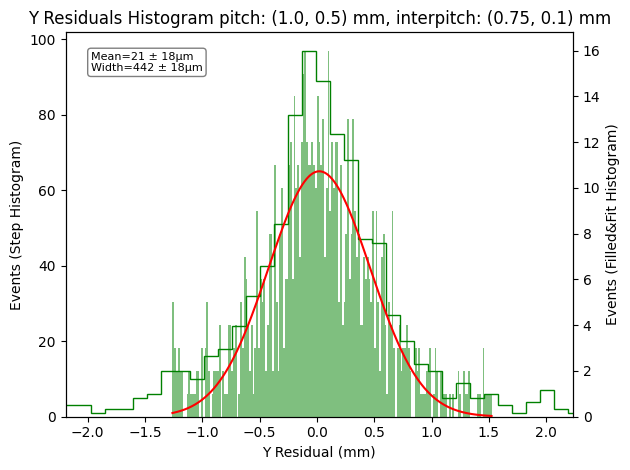

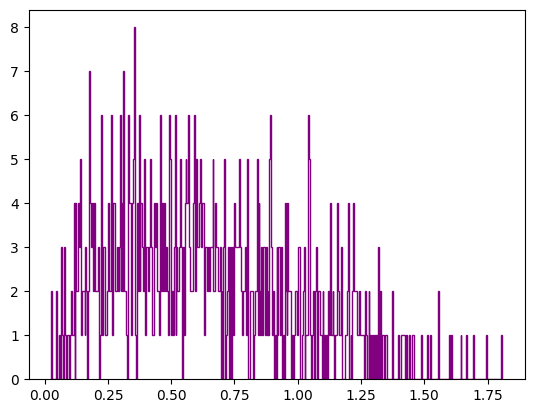

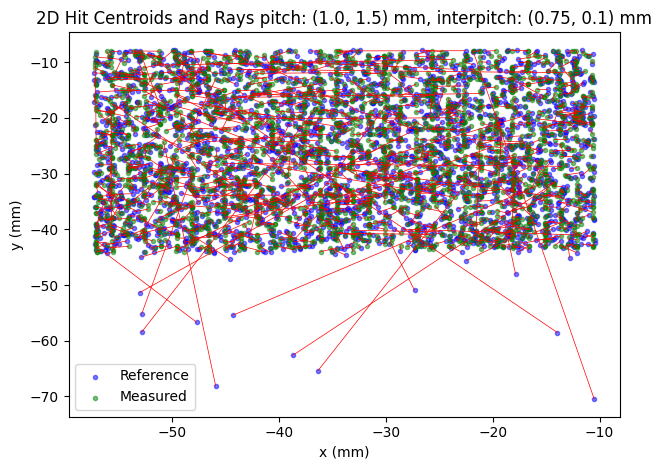

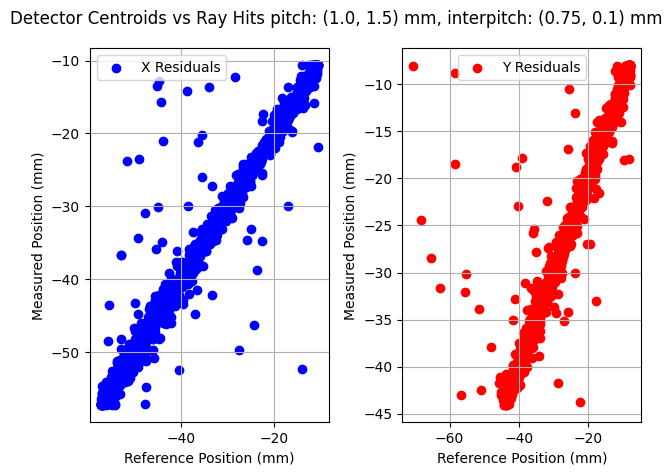

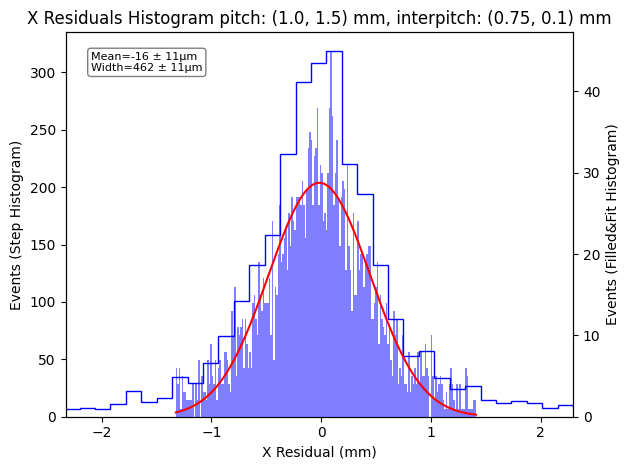

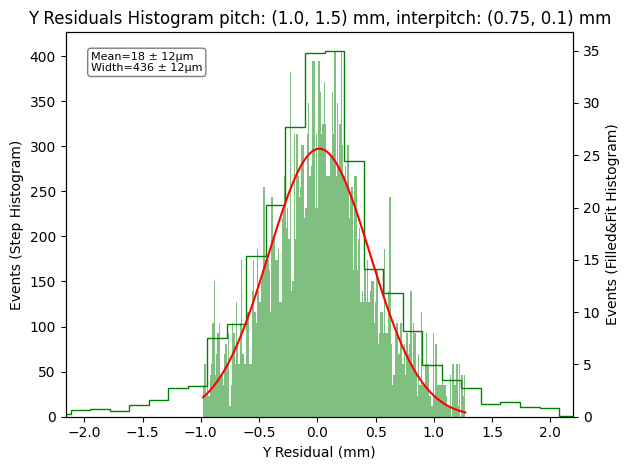

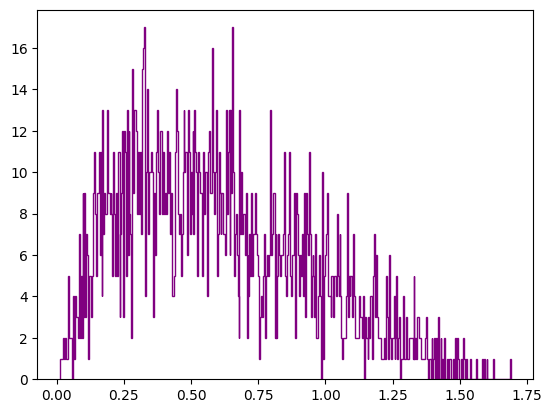

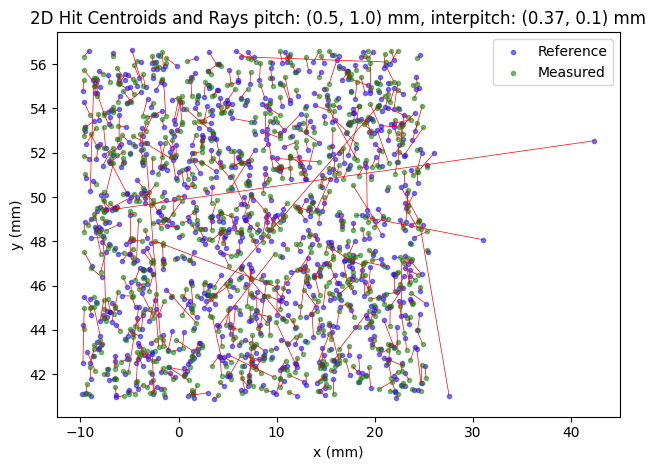

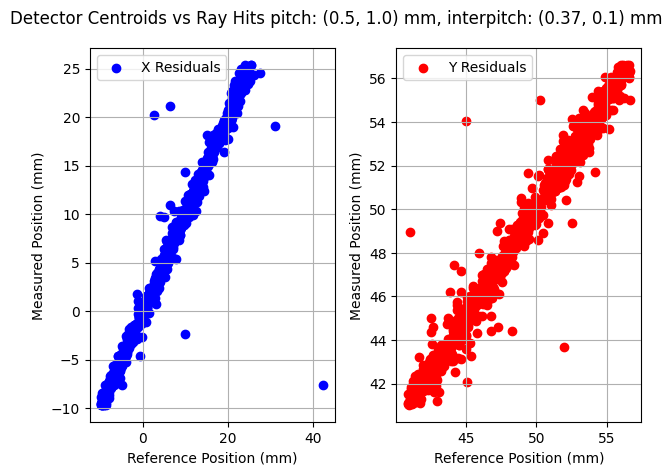

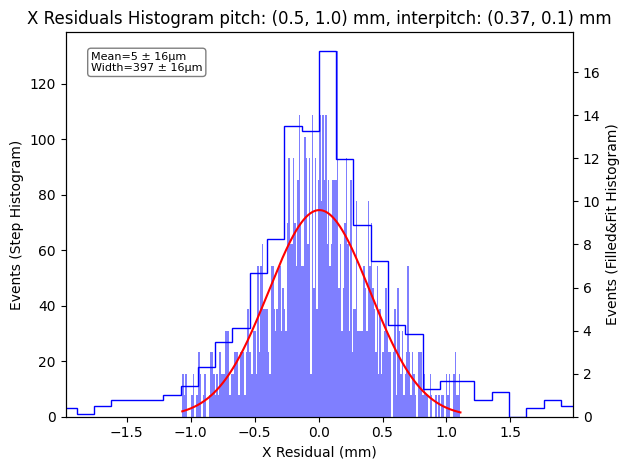

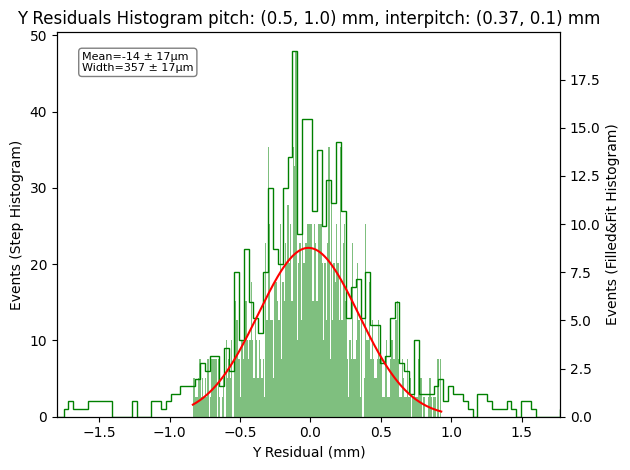

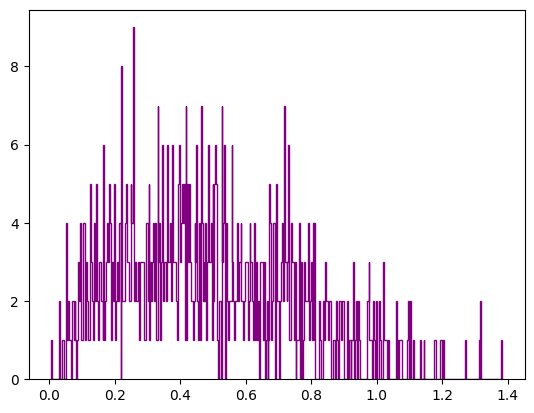

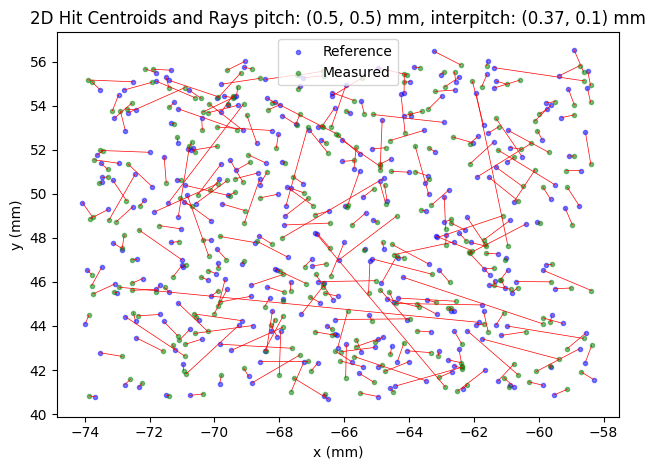

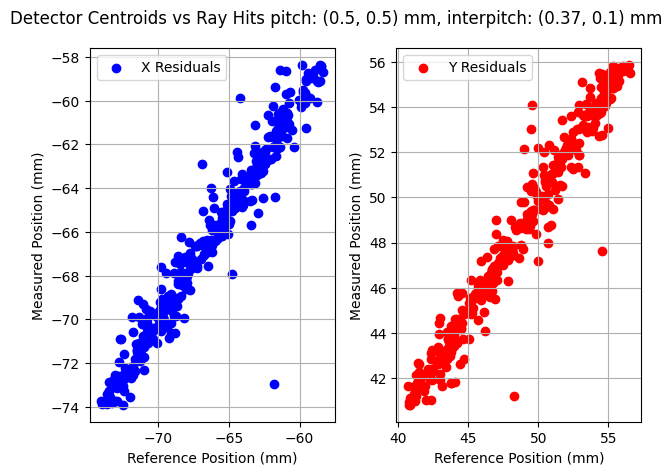

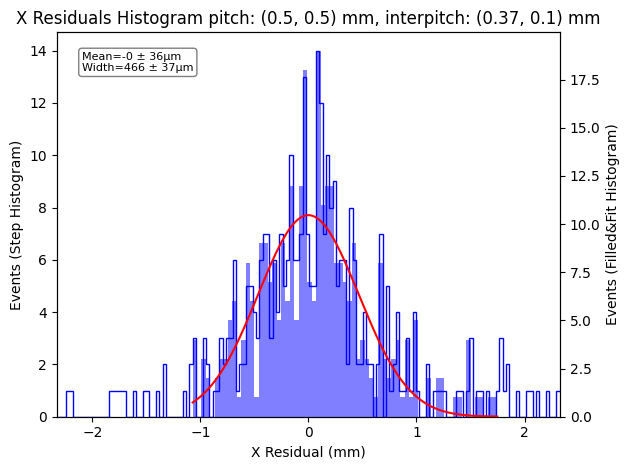

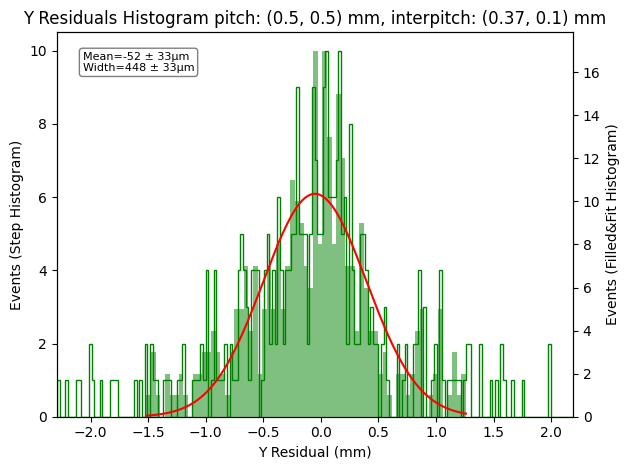

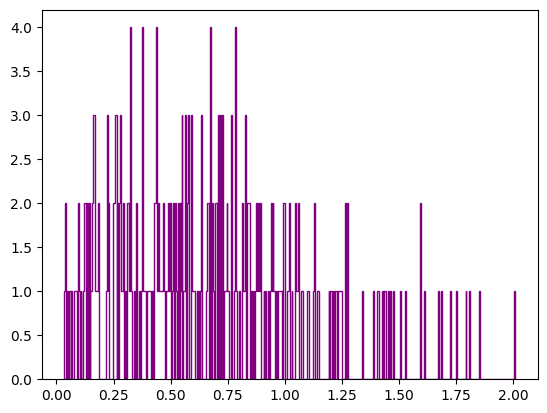

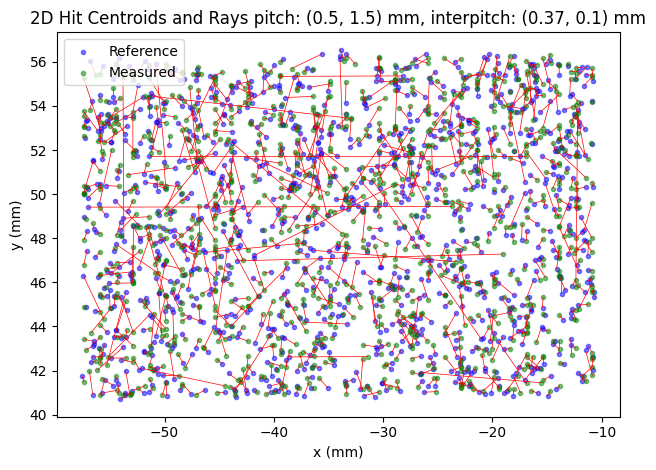

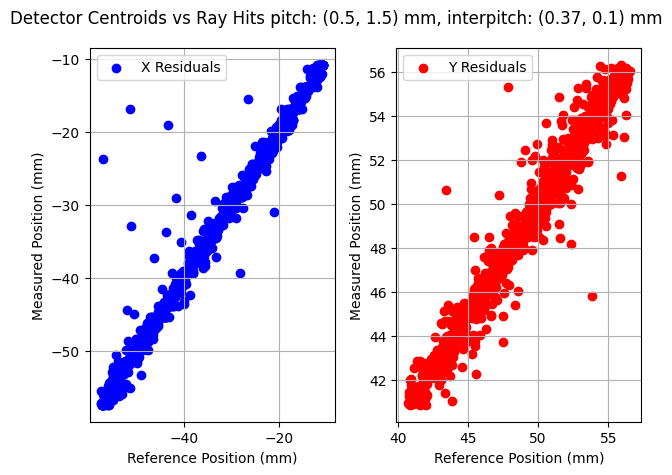

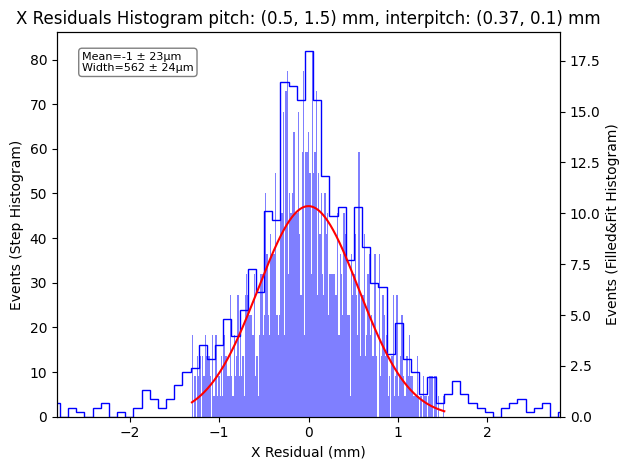

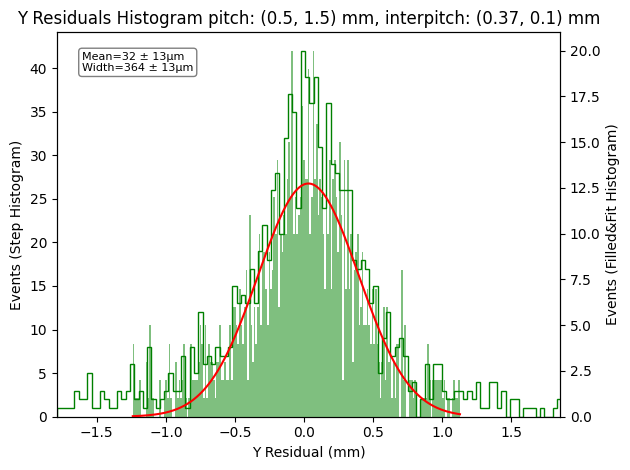

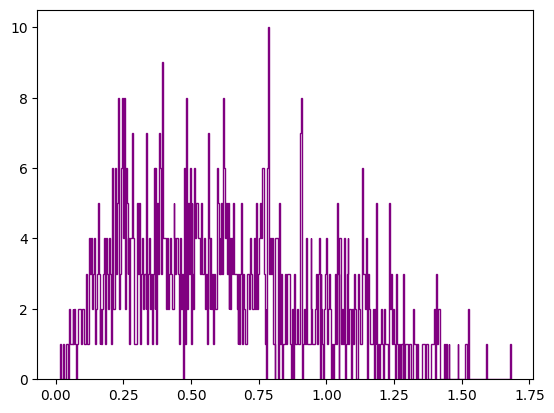

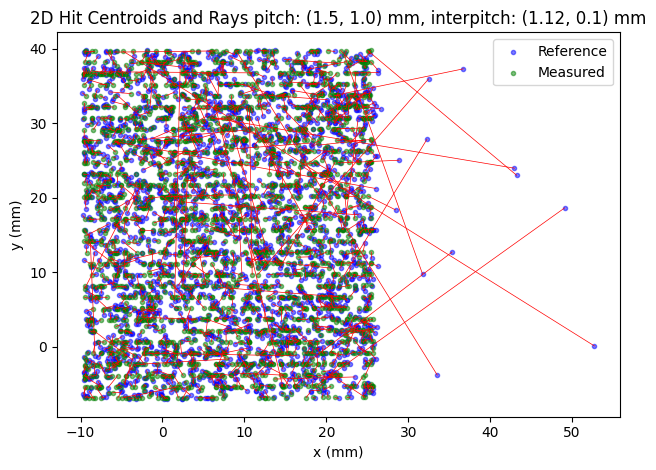

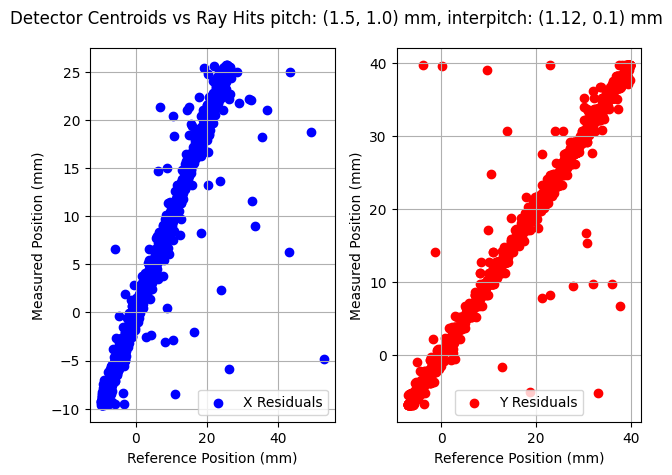

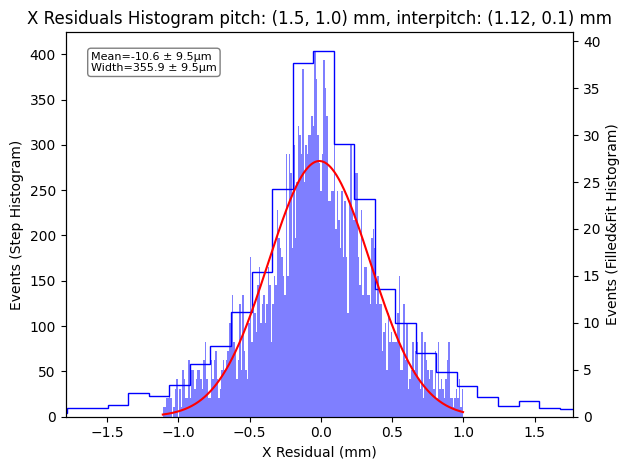

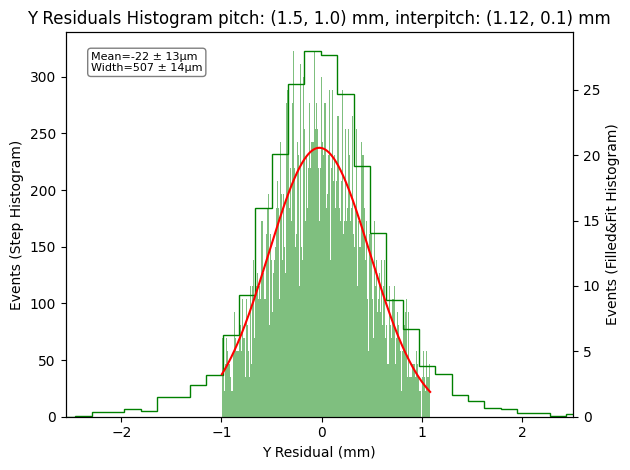

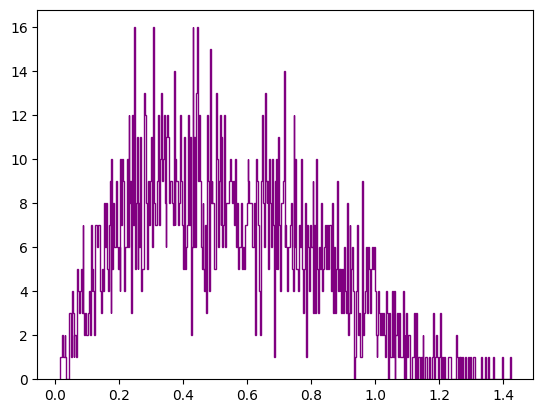

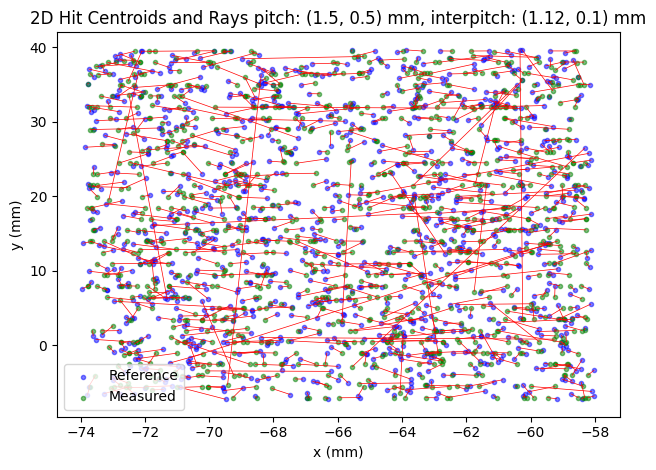

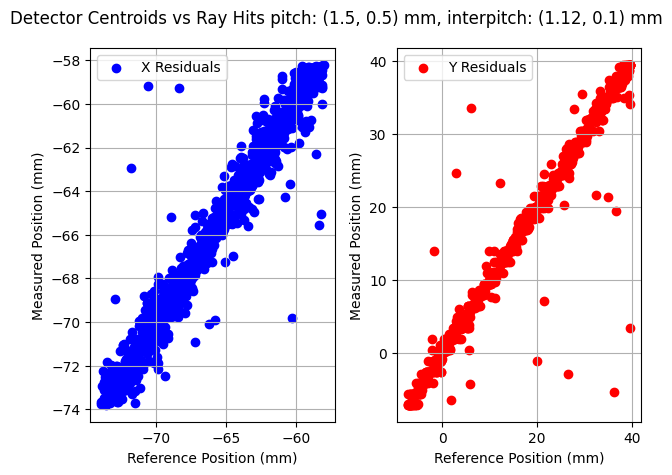

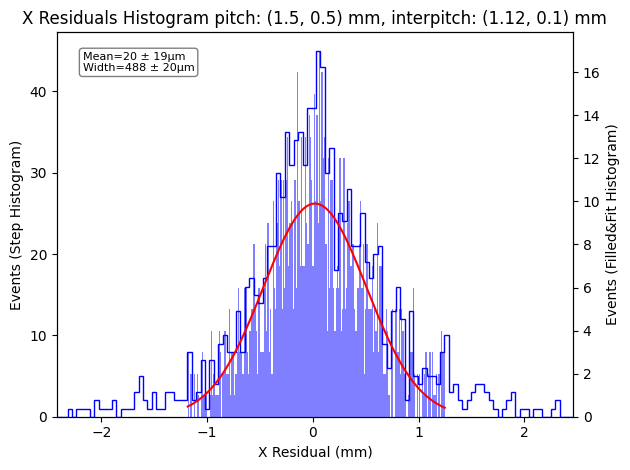

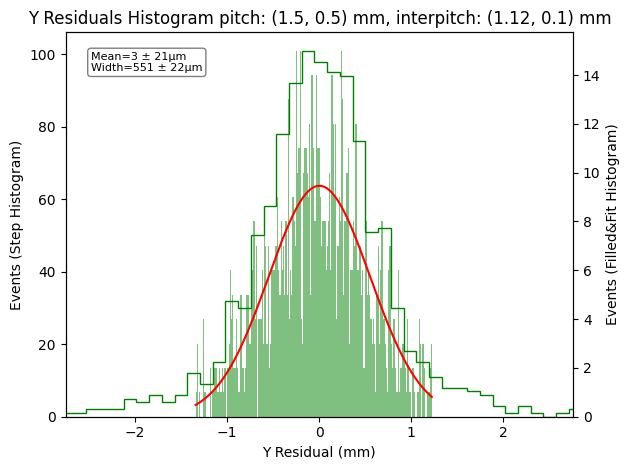

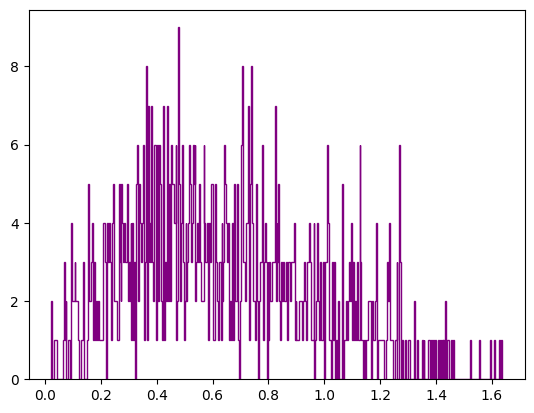

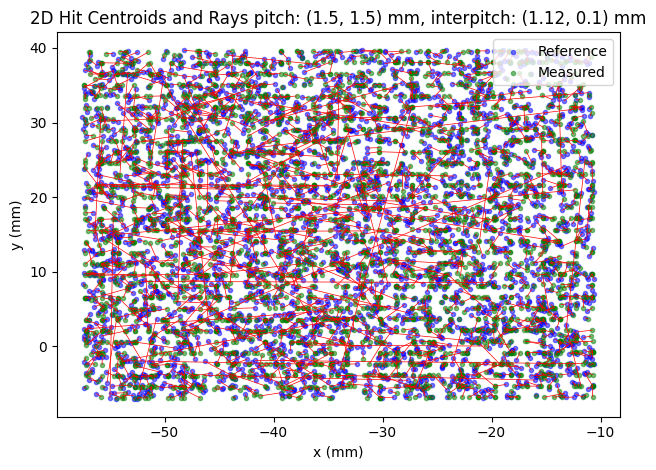

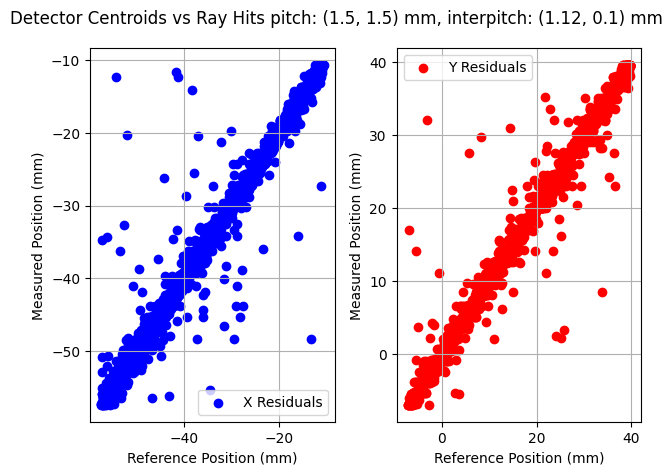

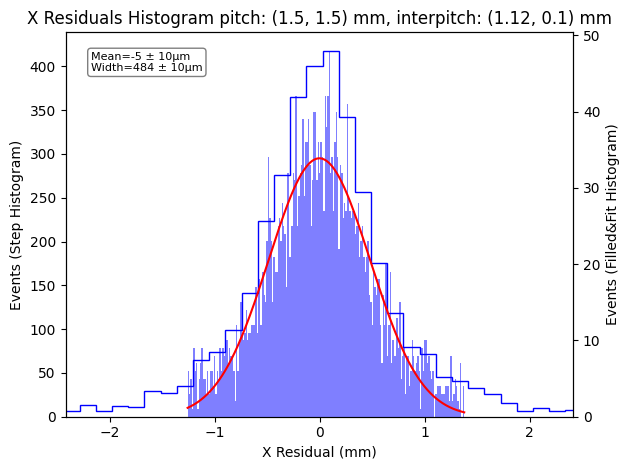

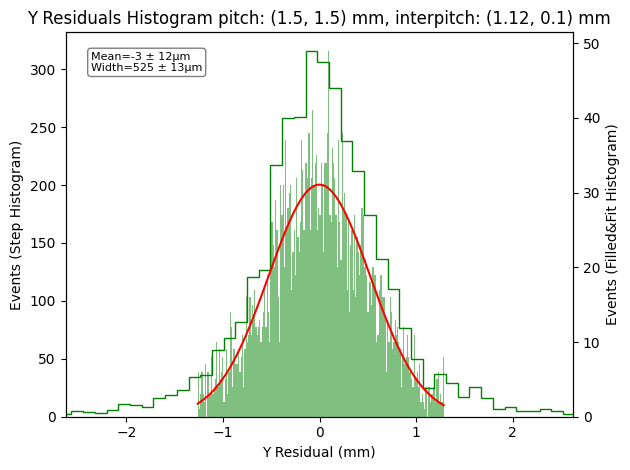

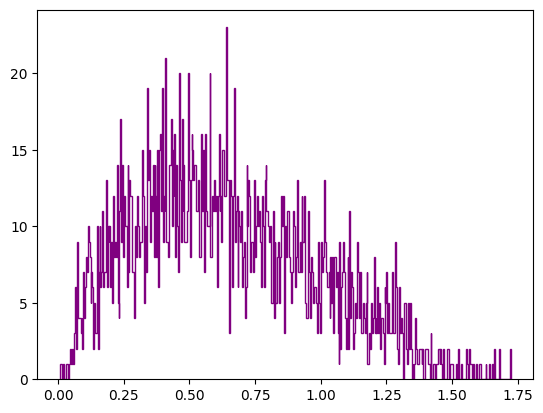

In [18]:
get_residuals(det, ray_data, plot=True, in_det=True, tolerance=0.2)

In [19]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2)

   pitch_x  pitch_y  interpitch_x  interpitch_y    x_mean  x_mean_err  \
0      1.0      1.0          0.75           0.1 -0.011629    0.010753   
1      1.0      0.5          0.75           0.1  0.054438    0.019474   
2      1.0      1.5          0.75           0.1 -0.015555    0.011240   
3      0.5      1.0          0.37           0.1  0.006043    0.017030   
4      0.5      0.5          0.37           0.1 -0.001212    0.031968   
5      0.5      1.5          0.37           0.1 -0.001273    0.023110   
6      1.5      1.0          1.12           0.1 -0.010567    0.009505   
7      1.5      0.5          1.12           0.1  0.019797    0.019198   
8      1.5      1.5          1.12           0.1 -0.004529    0.010348   

     y_mean  y_mean_err     x_std  x_std_err     y_std  y_std_err  
0  0.398714    0.012780  0.382635   0.010827  0.398714   0.012780  
1  0.441987    0.017287  0.470072   0.019627  0.441987   0.017287  
2  0.435503    0.011793  0.462446   0.011269  0.435503   0.011793

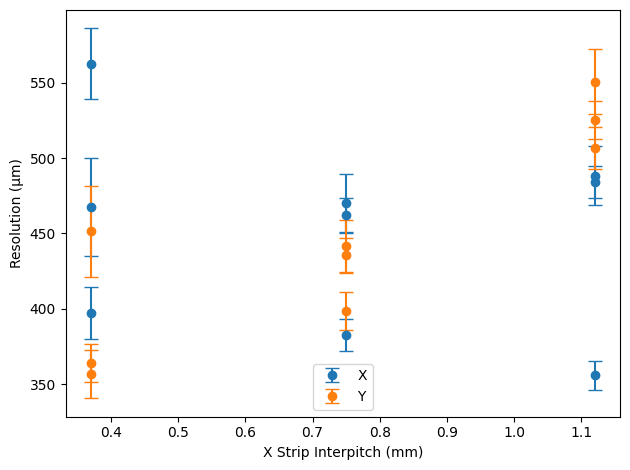

In [20]:
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

   pitch_x  pitch_y  interpitch_x  interpitch_y    x_mean  x_mean_err  \
0      1.0      1.0          0.75           0.1 -0.012585    0.010888   
1      1.0      0.5          0.75           0.1  0.053493    0.021421   
2      1.0      1.5          0.75           0.1 -0.016872    0.011304   
3      0.5      1.0          0.37           0.1  0.002915    0.018443   
4      0.5      0.5          0.37           0.1  0.004117    0.034801   
5      0.5      1.5          0.37           0.1 -0.000515    0.024073   
6      1.5      1.0          1.12           0.1 -0.009404    0.010404   
7      1.5      0.5          1.12           0.1  0.024887    0.020807   
8      1.5      1.5          1.12           0.1 -0.003697    0.010404   

     y_mean  y_mean_err     x_std  x_std_err     y_std  y_std_err  
0  0.391824    0.013947  0.370699   0.011145  0.391824   0.013947  
1  0.421643    0.018840  0.445593   0.022248  0.421643   0.018840  
2  0.412609    0.012088  0.438726   0.011754  0.412609   0.012088

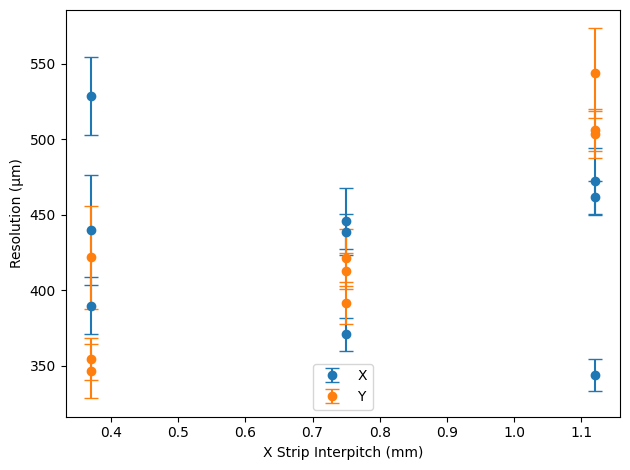

In [21]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2, max_r=2)
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

New stuff above

   pitch_x  pitch_y  interpitch_x  interpitch_y    x_mean  x_mean_err  \
0      1.0      1.0          0.75           0.1 -0.012585    0.010888   
1      1.0      0.5          0.75           0.1  0.053493    0.021421   
2      1.0      1.5          0.75           0.1 -0.016872    0.011304   
3      0.5      1.0          0.37           0.1  0.002915    0.018443   
4      0.5      0.5          0.37           0.1  0.004117    0.034801   
5      0.5      1.5          0.37           0.1 -0.000515    0.024073   
6      1.5      1.0          1.12           0.1 -0.009404    0.010404   
7      1.5      0.5          1.12           0.1  0.024887    0.020807   
8      1.5      1.5          1.12           0.1 -0.003697    0.010404   

     y_mean  y_mean_err     x_std  x_std_err     y_std  y_std_err  
0  0.391824    0.013947  0.370699   0.011145  0.391824   0.013947  
1  0.421643    0.018840  0.445593   0.022248  0.421643   0.018840  
2  0.412609    0.012088  0.438726   0.011754  0.412609   0.012088

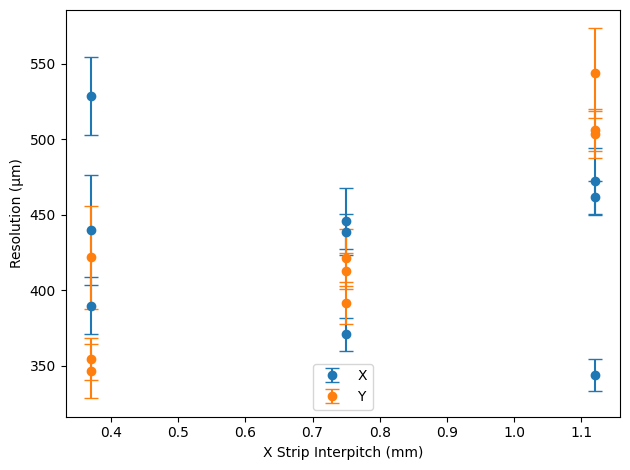

In [22]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2, max_r=2)
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

Rays in sub-detector 0: 6181, total rays: 196575
Rays in sub-detector 1: 1162, total rays: 196575
Rays in sub-detector 2: 4474, total rays: 196575
Rays in sub-detector 3: 1250, total rays: 196575
Rays in sub-detector 4: 236, total rays: 196575
Rays in sub-detector 5: 857, total rays: 196575
Rays in sub-detector 6: 4575, total rays: 196575
Rays in sub-detector 7: 838, total rays: 196575
Rays in sub-detector 8: 3281, total rays: 196575


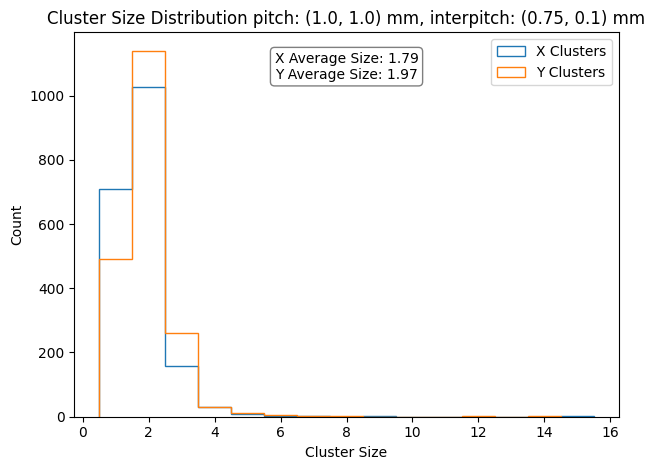

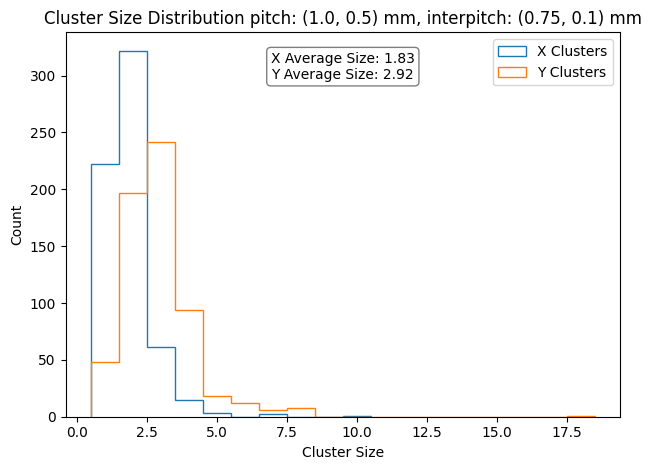

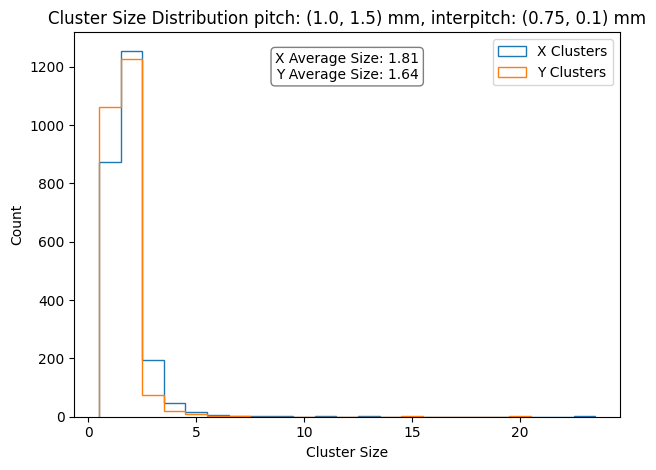

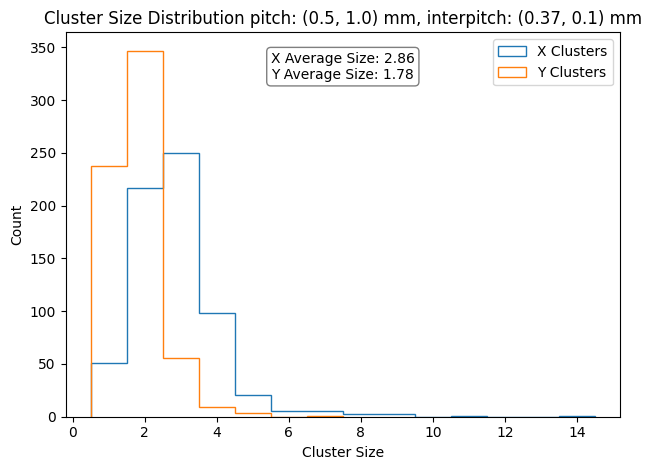

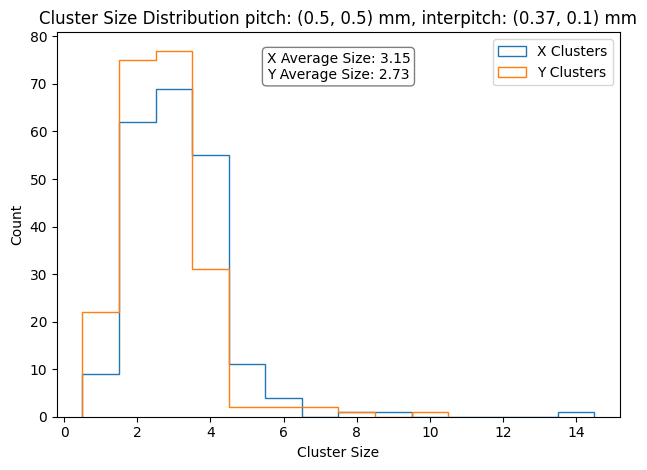

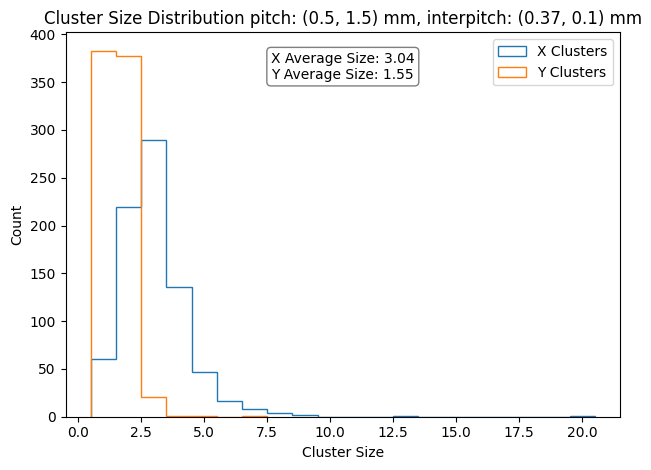

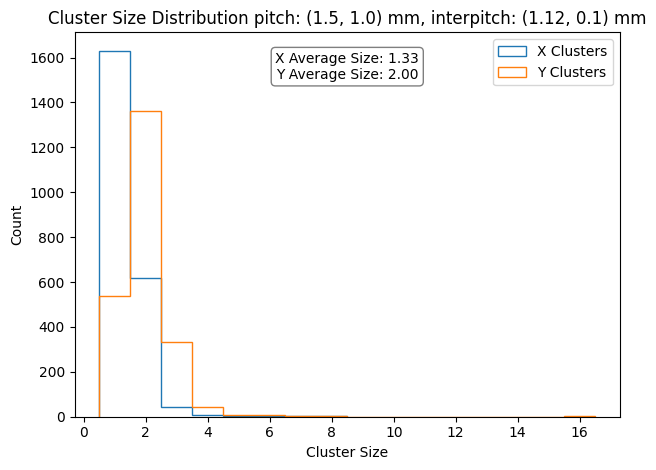

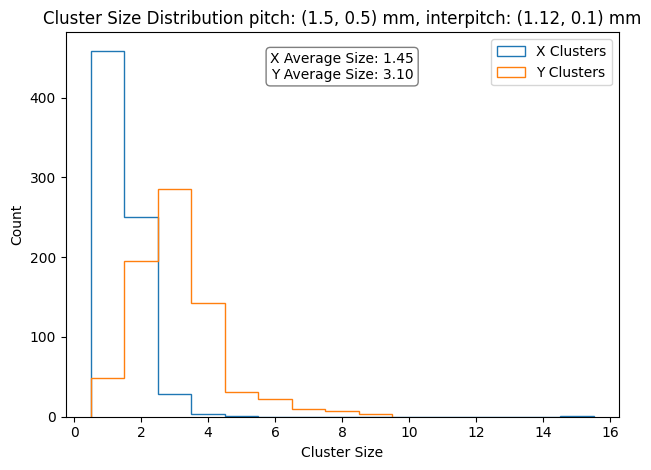

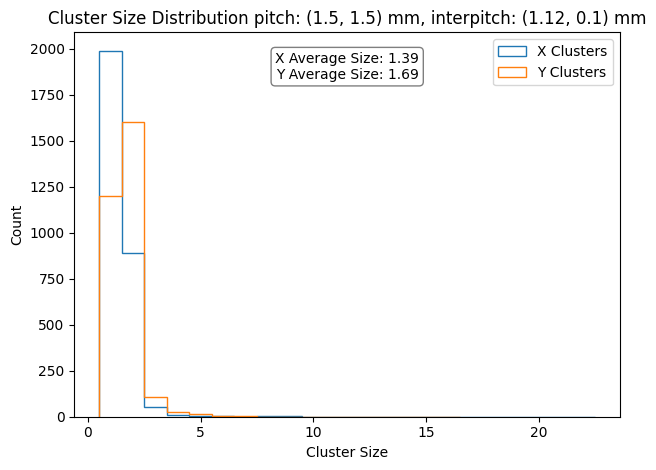

In [23]:
x_rays, y_rays, event_num_rays = ray_data.get_xy_positions(det.center[2])
pitches, x_means, x_errs, y_means, y_errs = [], [], [], [], []
for sub_det in det.sub_detectors:
    x_rays_in, y_rays_in, event_num_rays_in = get_rays_in_sub_det_vectorized(det, det.sub_detectors[sub_det.sub_index], x_rays, y_rays, event_num_rays, tolerance=-2)
    print(f'Rays in sub-detector {sub_det.sub_index}: {len(x_rays_in)}, total rays: {len(x_rays)}')
    x_mean, y_mean, x_err, y_err = sub_det.plot_cluster_sizes(event_nums=event_num_rays_in)
    pitches.append(sub_det.x_interpitch)
    x_means.append(x_mean)
    x_errs.append(x_err)
    y_means.append(y_mean)
    y_errs.append(y_err)

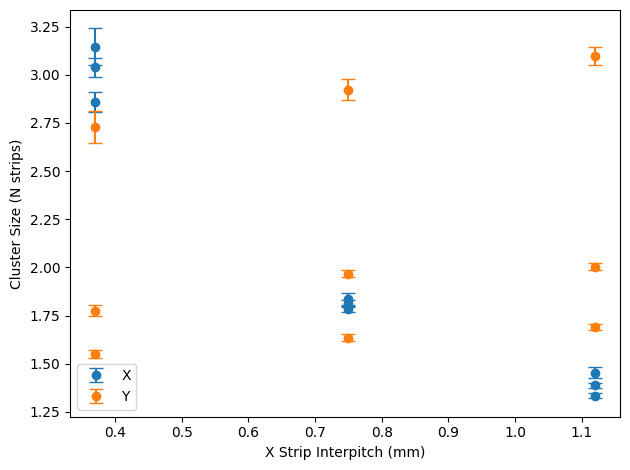

In [24]:
fig, ax = plt.subplots()
ax.errorbar(pitches, x_means, yerr=x_errs, fmt='o', capsize=5, label='X')
ax.errorbar(pitches, y_means, yerr=y_errs, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Cluster Size (N strips)')
fig.tight_layout()

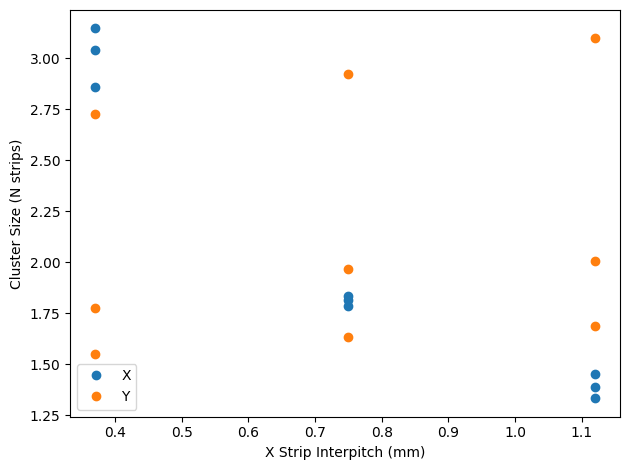

In [25]:
fig, ax = plt.subplots()
ax.plot(pitches, x_means, 'o', label='X')
ax.plot(pitches, y_means, 'o', label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Cluster Size (N strips)')
fig.tight_layout()

In [26]:
x_res, y_res, x_rays, y_rays = get_raw_residuals(det, ray_data, in_det=True, tolerance=0.0)

/local/home/dn277127/PycharmProjects/saclay_micromegas/poc/det_classes_test.py:822: RuntimeWarning: All-NaN axis encountered
  print(f'scan_res min: {np.nanmin(scan_resolution_vals)}, max: {np.nanmax(scan_resolution_vals)}')
/local/home/dn277127/PycharmProjects/saclay_micromegas/poc/det_classes_test.py:823: RuntimeWarning: All-NaN axis encountered
  res_vmin, res_vmax = np.nanmin(scan_resolution_vals), np.nanpercentile(scan_resolution_vals, percentile_filter[1])
/local/home/dn277127/PycharmProjects/saclay_micromegas/.venv/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


scan_res min: nan, max: nan
res_vmax: nan
mean_vmin: nan, mean_vmax: nan


ValueError: lower_level and upper_level cannot be NaN

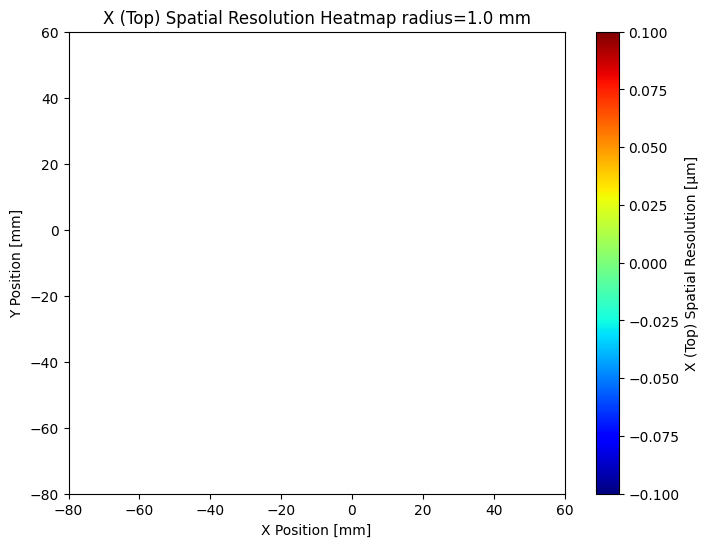

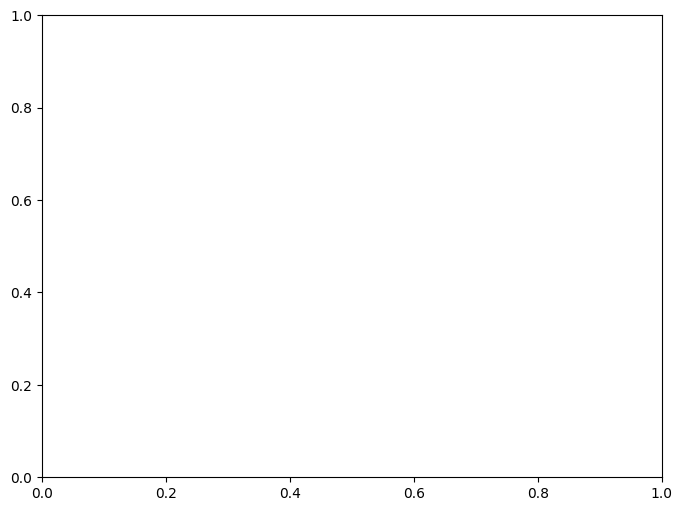

In [27]:
scan_xs = np.linspace(-80, 60, 140 + 1)
scan_ys = np.linspace(-80, 60, 140 + 1)

# Generate mesh grid
x_mesh, y_mesh = np.meshgrid(scan_xs, scan_ys)
xy_pairs = list(zip(x_mesh.ravel(), y_mesh.ravel()))  # Flatten to list of (x, y) pairs
scan_radius = 1
min_events = 30
# res_range = [160, 810]  # μm
# mean_range = [-200, 210]  # μm
res_range = None  # μm
mean_range = None  # μm

scan_resolutions_x, scan_means_x, events_x = get_circle_scan(np.array(x_res), np.array(x_rays), np.array(y_rays), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_resolutions_x, scan_means_x, scan_xs, scan_ys, scan_events=events_x, radius=scan_radius, percentile_filter=(1, 99), conversion_factor=1e3, unit_str='μm', res_title='X (Top) Spatial Resolution', mean_title='X (Top) Mean Residual', res_range=res_range, mean_range=mean_range)

In [ ]:
scan_resolutions_y, scan_means_y, events_y = get_circle_scan(np.array(y_res), np.array(x_rays), np.array(y_rays), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_resolutions_y, scan_means_y, scan_xs, scan_ys, scan_events=events_y, radius=scan_radius, percentile_filter=(1, 99), conversion_factor=1e3, unit_str='μm', res_title='Y (Bottom) Spatial Resolution', mean_title='Y (Bottom) Mean Residual', res_range=res_range, mean_range=mean_range)

In [ ]:
x_res, y_res, x_rays, y_rays = get_raw_residuals(det, ray_data, in_det=True, tolerance=0.0)
scan_radius = 2
min_events = 50
x_rays, y_rays, event_num_rays = ray_data.get_xy_positions(det.center[2])
x_sizes_all, y_sizes_all, x_rays_cluster_sizes, y_rays_cluster_sizes = [], [], [], []
for sub_det in det.sub_detectors:
    x_rays_in, y_rays_in, event_num_rays_in = get_rays_in_sub_det_vectorized(det, det.sub_detectors[sub_det.sub_index], x_rays, y_rays, event_num_rays, tolerance=0)
    x_sizes, y_sizes, ray_mask = sub_det.get_cluster_sizes(largest=True, event_nums=event_num_rays_in, return_ray_mask=True)
    x_sizes_all.extend(x_sizes)
    y_sizes_all.extend(y_sizes)
    x_rays_cluster_sizes.extend(x_rays_in[ray_mask])
    y_rays_cluster_sizes.extend(y_rays_in[ray_mask])
scan_resolutions_csx, scan_means_csx, events_csx = get_circle_scan(np.array(x_sizes_all), np.array(x_rays_cluster_sizes), np.array(y_rays_cluster_sizes), xy_pairs, radius=scan_radius, shape='square', gaus_fit=False, min_events=min_events, plot=False)
plot_2D_circle_scan(scan_resolutions_csx, scan_means_csx, scan_xs, scan_ys, scan_events=events_csx, radius=scan_radius, percentile_filter=(1, 95), plot='mean', unit_str='N strips', mean_title='X Cluster Size')

In [ ]:
scan_resolutions_csy, scan_means_csy, events_csy = get_circle_scan(np.array(y_sizes_all), np.array(x_rays_cluster_sizes), np.array(y_rays_cluster_sizes), xy_pairs, radius=scan_radius, percentile_cuts=(1, 99), shape='square', gaus_fit=False, min_events=min_events, plot=False)
plot_2D_circle_scan(scan_resolutions_csy, scan_means_csy, scan_xs, scan_ys, scan_events=events_csy, radius=scan_radius, percentile_filter=(1, 99), plot='mean', unit_str='N strips', mean_title='Y Cluster Size')

In [ ]:
det.dream_data.correct_for_fine_timestamps()

sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=None, plot=True)
plt.title(f'Time of Max for X (Top) Strips')

sigma_y, sigma_y_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, plot=True)
plt.title(f'Time of Max for Y (Bottom) Strips')

In [ ]:
min_amp = 600
sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=min_amp, plot=True)
plt.title(f'Time of Max for X (Top) Strips Min Amp {min_amp}')

sigma_y, sigma_y_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=min_amp, plot=True)
plt.title(f'Time of Max for Y (Bottom) Strips Min Amp {min_amp}')

In [ ]:
x_time_maxes = det.dream_data.get_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=None, filter_times=False)
x_time_maxes, x_time_filter = det.dream_data.filter_time_maxes(x_time_maxes, return_mask=True)
y_time_maxes = det.dream_data.get_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, filter_times=False)
y_time_maxes, y_time_filter = det.dream_data.filter_time_maxes(y_time_maxes, return_mask=True)
time_ray_event_mask_x = np.isin(event_num_rays, det.dream_data.event_nums[x_time_filter])
time_ray_event_mask_y = np.isin(event_num_rays, det.dream_data.event_nums[y_time_filter])
x_rays_timing_x, y_rays_timing_x = x_rays[time_ray_event_mask_x], y_rays[time_ray_event_mask_x]
x_rays_timing_y, y_rays_timing_y = x_rays[time_ray_event_mask_y], y_rays[time_ray_event_mask_y]

In [ ]:
scan_radius = 2
min_events = 100
res_range = [20, 44]  # ns
mean_range = [405, 425]  # ns
scan_time_resolutions_x, scan_time_means_x, events_time_x = get_circle_scan(np.array(x_time_maxes), np.array(x_rays_timing_x), np.array(y_rays_timing_x), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_time_resolutions_x, scan_time_means_x, scan_xs, scan_ys, scan_events=events_time_x, radius=scan_radius, percentile_filter=(1, 99), plot='both', unit_str='ns', res_title='Time Resolution X (Top) Strips', mean_title='Mean Time X (Top) Strips', res_range=res_range, mean_range=mean_range)

In [ ]:
scan_time_resolutions_y, scan_time_means_y, events_time_y = get_circle_scan(np.array(y_time_maxes), np.array(x_rays_timing_y), np.array(y_rays_timing_y), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_time_resolutions_y, scan_time_means_y, scan_xs, scan_ys, scan_events=events_time_y, radius=scan_radius, percentile_filter=(1, 99), plot='both', unit_str='ns', res_title='Time Resolution Y (Bottom) Strips', mean_title='Mean Time Y (Bottom) Strips', res_range=res_range, mean_range=mean_range)

In [ ]:
edge_cushion = 5 # mm
det_z = det.center[2]
for sub_det in det.sub_detectors:
    x_min_loc, x_max_loc = np.min(sub_det.x_pos), np.max(sub_det.x_pos)
    y_min_loc, y_max_loc = np.min(sub_det.y_pos), np.max(sub_det.y_pos)
    top_left, top_right = (x_min_loc, y_max_loc, det_z), (x_max_loc, y_max_loc, det_z)
    bottom_left, bottom_right = (x_min_loc, y_min_loc, det_z), (x_max_loc, y_min_loc, det_z)
    top_left, top_right = det.convert_coords_to_global(top_left), det.convert_coords_to_global(top_right)
    bottom_left, bottom_right = det.convert_coords_to_global(bottom_left), det.convert_coords_to_global(bottom_right)
    print(f'Sub-detector {sub_det.sub_index} corners:')
    print(f'Top Left: {top_left}, Top Right: {top_right}, Bottom Left: {bottom_left}, Bottom Right: {bottom_right}')
